# Car Price Prediciton

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show

In [5]:
car_df  = pd.read_csv("https://raw.githubusercontent.com/overtunned/carpriceprediction/main/Dataset/audi.csv")

In [8]:
car_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [9]:
car_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [14]:
car_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [13]:
car_df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [17]:
cat_df = car_df.select_dtypes(include=["object"])
cat_df.head()

,model,transmission,fuelType
0,A1,Manual,Petrol
1,A6,Automatic,Diesel
2,A1,Manual,Petrol
3,A4,Automatic,Diesel
4,A3,Manual,Petrol


In [25]:
cat_df.model.value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [24]:
cat_df.transmission.value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [26]:
cat_df.fuelType.value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

<AxesSubplot:>

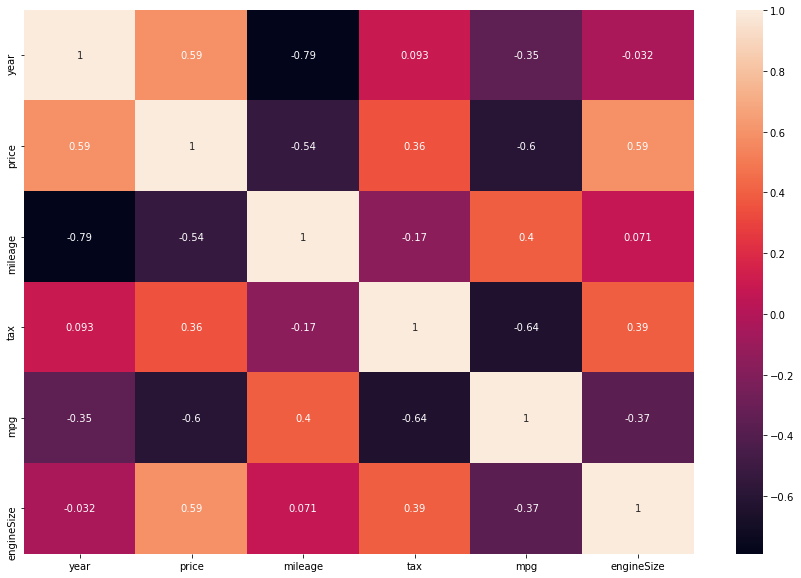

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(car_df.corr(),annot = True)

In [56]:
price_year = pd.DataFrame(car_df[['year','price']].groupby('year').mean())
px.line(price_year)

Price of cars have been on the rise as the years goes by. At present, it is now at the peak of all previous year prices

In [77]:
px.scatter(car_df,x='mileage', y = 'price')

From the above graph we can see that the price of the car decreases as the distance the car was used for increases. No car is priced more than 20k after a distance of 100k, 

In [89]:
price_mpg = pd.DataFrame(car_df[['mpg','price']].groupby('mpg').mean())
px.scatter(price_mpg)

30From the graph we can see that the value of cars having price above 50k all have a mpg below 

In [66]:
engineover2= car_df[car_df.engineSize>2].price.mean()
engineunder2 = car_df[car_df.engineSize<=2].price.mean()
df = pd.DataFrame([engineunder2,engineover2], columns=["Price_mean"],index=["engineSize_under2","engineSize_over2"])
px.bar(df)

We can see that the price of a car increases as the size of the engine it uses increases.

In [78]:
mpg_engine0to2= car_df[car_df.engineSize<=2].mpg.mean()
mpg_engine2to4 = car_df[(car_df.engineSize>2) & (car_df.engineSize<=4)].mpg.mean()
mpg_engine4to6 = car_df[(car_df.engineSize>2) & (car_df.engineSize<=6)].mpg.mean()
df = pd.DataFrame([mpg_engine0to2,mpg_engine2to4,mpg_engine4to6], columns=["mileage"],index=["engineSize 0 to 2","engineSize 2 to 4","engineSize 4 to 6"])
px.bar(df)

The miles per gallon of the car decreases as the size of the engine increases. This is becauses it takes more fuel to power a bigger engine than a smaller one. Hence the decreases in the mpg.